In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("./public/FinalGroupdataset.xlsx")

In [3]:
data

,Date,Month,Year,Stock Movement,Ticker,CPI,Inflation,Average House Prices,Hourly Wage,Gold,10 Years Bond Interest,Bitcoin,Bank Interest Rate
0,1999-12-31,12,1999,8481.10,S&P/TSX Composite Canada,93.7,0.0272,119600.0,24.72,273.60000,NaN,NaN,NaN
1,2000-01-31,1,2000,9129.00,S&P/TSX Composite Canada,93.5,0.0272,170696.0,24.72,273.60000,NaN,NaN,NaN
2,2000-02-29,2,2000,9462.40,S&P/TSX Composite Canada,94.1,0.0272,170894.0,24.72,273.60000,NaN,NaN,NaN
3,2000-03-31,3,2000,9347.60,S&P/TSX Composite Canada,94.8,0.0272,171711.0,24.72,273.60000,NaN,NaN,NaN
4,2000-04-30,4,2000,9252.00,S&P/TSX Composite Canada,94.5,0.0272,171909.0,24.72,273.60000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-07-31,7,2024,23346.20,S&P/TSX Composite Canada,162.1,NaN,718000.0,NaN,2659.92865,3.32,NaN,NaN
296,2024-08-31,8,2024,24000.40,S&P/TSX Composite Canada,161.8,NaN,718000.0,NaN,2659.22090,3.03,NaN,NaN
297,2024-09-30,9,2024,24156.90,S&P/TSX Composite Canada,161.1,NaN,718000.0,NaN,2426.50000,2.86,NaN,NaN
298,2024-10-31,10,2024,24890.70,S&P/TSX Composite Canada,NaN,NaN,NaN,NaN,2493.80000,3.13,NaN,NaN


In [4]:
inflation_data = data[~(data["Inflation"].isna())][["Date","Inflation"]]

In [5]:
inflation_data

,Date,Inflation
0,1999-12-31,0.0272
1,2000-01-31,0.0272
2,2000-02-29,0.0272
3,2000-03-31,0.0272
4,2000-04-30,0.0272
...,...,...
241,2020-01-31,0.0072
253,2021-01-31,0.0340
265,2022-01-31,0.0680
277,2023-01-31,0.0388


In [6]:
dollar_effect = (1 + inflation_data["Inflation"]).cumprod()

In [7]:
inflation_data["dollar_deval"] = 1 / dollar_effect

In [8]:
inflation_data.columns

Index(['Date', 'Inflation', 'dollar_deval'], dtype='object')

In [9]:
import json

In [10]:
with open("dollarDevaluation.json", "w") as file:
    file.write(inflation_data[["Date", "dollar_deval"]].to_json(orient="records"))


In [2]:
import pandas as pd

In [109]:
inflation = pd.read_excel("./public/Infaltion.xlsx",sheet_name="Data")

In [110]:
inflation = inflation.iloc[4:-6,[1,2]]

In [111]:
inflation.head()

,Unnamed: 1,Unnamed: 2
4,1987,4.37
5,1988,4.03
6,1989,4.98
7,1990,4.78
8,1991,5.63


In [112]:
inflation.columns = ["date", "inflation"]

In [113]:
inflation["inflation"] = inflation["inflation"]/100

In [114]:
inflation.head()

,date,inflation
4,1987,0.0437
5,1988,0.0403
6,1989,0.0498
7,1990,0.0478
8,1991,0.0563


In [115]:
inflation["date"] = pd.to_datetime(inflation.date, format="%Y")

In [116]:
inflation.head()

,date,inflation
4,1987-01-01,0.0437
5,1988-01-01,0.0403
6,1989-01-01,0.0498
7,1990-01-01,0.0478
8,1991-01-01,0.0563


In [119]:
inflation  = inflation.iloc[3:,:]

In [120]:
inflation.head()

,date,inflation
17,2000-01-01,0.0272
18,2001-01-01,0.0253
19,2002-01-01,0.0226
20,2003-01-01,0.0276
21,2004-01-01,0.0186


In [122]:
inflation_data = inflation[["date"]]

In [123]:
inflation_data["dollar_deval"] =1 / ((1+inflation["inflation"]).cumprod())

In [124]:
inflation_data.head()

,date,dollar_deval
17,2000-01-01,0.973520
18,2001-01-01,0.949498
19,2002-01-01,0.928514
20,2003-01-01,0.903575
21,2004-01-01,0.887075


In [125]:
import matplotlib.pyplot as plt

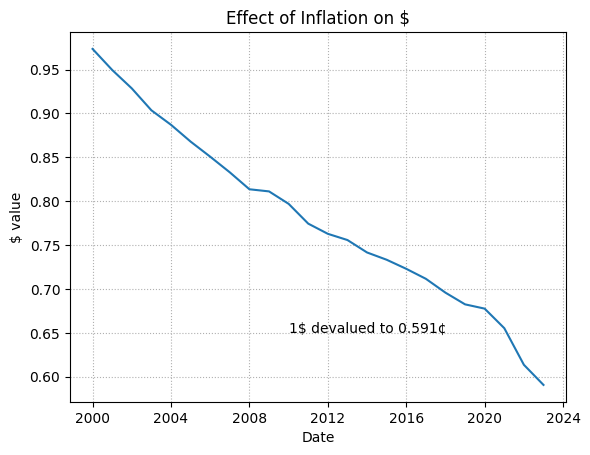

In [127]:
plt.plot(inflation_data.date, inflation_data.dollar_deval)
plt.grid(linestyle="dotted");
plt.xlabel("Date")
plt.ylabel("$ value")
plt.title("Effect of Inflation on $")
plt.annotate(f"1$ devalued to {inflation_data.dollar_deval.iloc[-1]:.3f}\u00A2",(inflation_data.date.iloc[10],0.65))
plt.show();

In [129]:
with open("inflation.json", "w") as file:
    file.write(inflation_data[["date", "dollar_deval"]].to_json(orient="records"))

In [12]:
data.columns

Index(['Date', 'Month', 'Year', 'Stock Movement', 'Ticker', 'CPI', 'Inflation',
       'Average House Prices', 'Hourly Wage', 'Gold', '10 Years Bond Interest',
       'Bitcoin', 'Bank Interest Rate'],
      dtype='object')

In [13]:
housing  = data[["Date", "Average House Prices"]]

In [14]:
housing = housing.dropna()

In [15]:
housing["returns"] = housing["Average House Prices"].pct_change()

In [16]:
housing = housing.dropna()

In [17]:
housing["dollar_apprec"] = (1 + housing["returns"]).cumprod()

In [29]:
with open("dollar_housing.json", "w") as file:
    file.write(housing[["Date", "dollar_apprec"]].to_json(orient="records"))

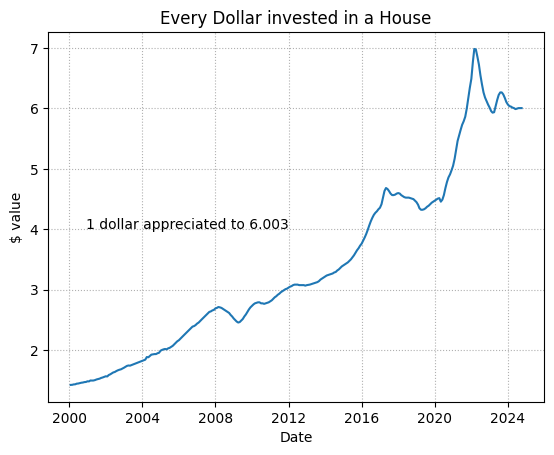

In [20]:
plt.plot(housing["Date"],housing["dollar_apprec"])
plt.grid(linestyle="dotted");
plt.xlabel("Date")
plt.ylabel("$ value")
plt.title("Every Dollar invested in a House")
plt.annotate(f"1 dollar appreciated to {housing.dollar_apprec.iloc[-1]:.3f}",(housing.Date.iloc[10],4))
plt.show();

In [21]:
stock_data = data[["Date", 'Stock Movement']]

In [23]:
stock_data["returns"] = stock_data["Stock Movement"].pct_change()

In [24]:
stock_data["dollar_value"] = (1 + stock_data["returns"]).cumprod()

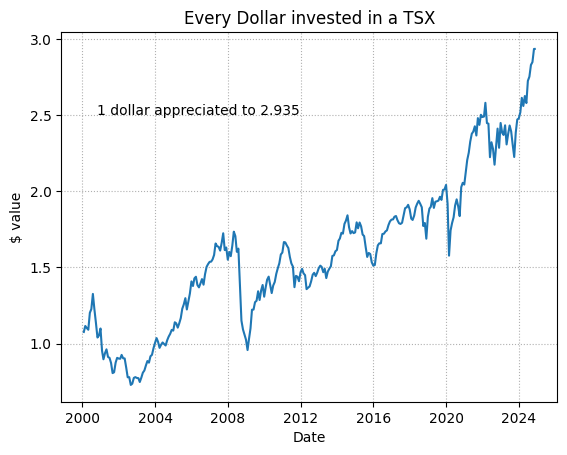

In [26]:
plt.plot(stock_data["Date"],stock_data["dollar_value"])
plt.grid(linestyle="dotted");
plt.xlabel("Date")
plt.ylabel("$ value")
plt.title("Every Dollar invested in a TSX")
plt.annotate(f"1 dollar appreciated to {stock_data.dollar_value.iloc[-1]:.3f}",(stock_data.Date.iloc[10],2.5))
plt.show();